In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [2]:
# Carregar o conjunto de dados CIFAR-10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
# Normalizar as imagens
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
# Carregar o modelo pré-treinado MobileNetV2, excluindo as camadas de classificação
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


9406464/9406464 [==============================] - 0s 0us/step


In [5]:
# Congelar as camadas do modelo base
base_model.trainable = False

In [6]:
# Adicionar novas camadas para a classificação
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [7]:
# Compilar o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Treinar o modelo
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 62s 37ms/step - loss: 1.9287 - accuracy: 0.3022 - val_loss: 1.8662 - val_accuracy: 0.3240
Epoch 2/10
1563/1563 [==============================] - 63s 41ms/step - loss: 1.8269 - accuracy: 0.3368 - val_loss: 1.8222 - val_accuracy: 0.3436
Epoch 3/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.7872 - accuracy: 0.3524 - val_loss: 1.8090 - val_accuracy: 0.3515
Epoch 4/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.7599 - accuracy: 0.3607 - val_loss: 1.8022 - val_accuracy: 0.3467
Epoch 5/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.7377 - accuracy: 0.3685 - val_loss: 1.7943 - val_accuracy: 0.3568
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.7191 - accuracy: 0.3758 - val_loss: 1.7912 - val_accuracy: 0.3566
Epoch 7/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.7036 - accuracy: 0.3805 - val_loss: 1.7886 -

In [9]:
# Avaliar o modelo
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 8s 26ms/step - loss: 1.8018 - accuracy: 0.3505
Test accuracy: 0.3504999876022339


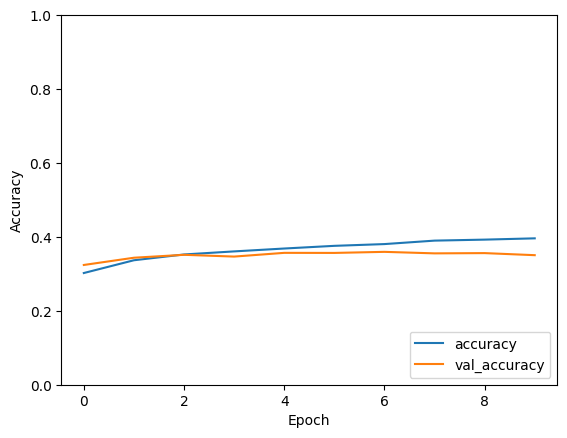

In [10]:
# Visualizar resultados
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [11]:
# Previsões em imagens de teste
predictions = model.predict(test_images)

313/313 [==============================] - 10s 29ms/step


In [21]:
# Mostrar algumas previsões
import numpy as np
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% (True: {class_names[true_label[0]]})", color=color)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

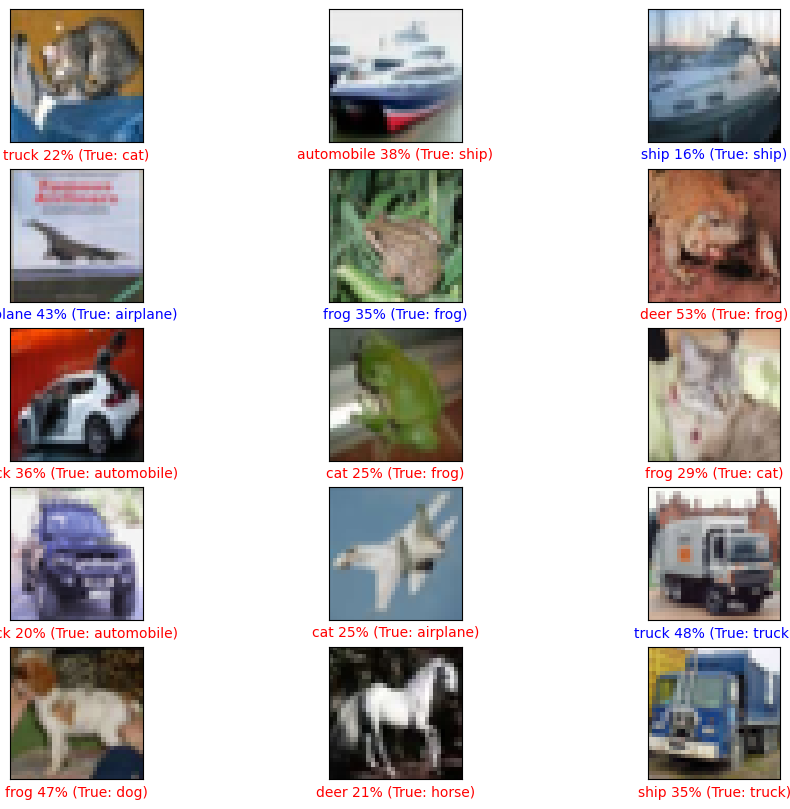

In [23]:
# Plotar as primeiras X imagens, suas previsões e os rótulos verdadeiros
# Colocar as previsões corretas em azul e as incorretas em vermelho
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
plt.show()